In [1]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")

coarseness_g (generic function with 1 method)

In [2]:
# Un ejemplo que toma K=7 en la version inicial del algoritmo DP
#                     K=4 en la version que omite secciones vacias coarseness_g(S,w)

n = 15
S = [
    0.7557374686676213  0.06419492229827028
    0.8184525221911587  0.5211640578368422
    0.5469180755043479  0.9571141421428488
    0.4351982955216729  0.34233991655949003
    0.5473231274475154  0.4399280293513139
    0.5837482725271874  0.5085426217218953
    0.38485213519511574 0.7381652031724553
    0.3941770305843393  0.03540479609509273
    0.8429600343652437  0.8372836029407078
    0.7568101146333601  0.14823287100088112
    0.5104238027781562  0.5728775814190357
    0.8093078142897505  0.7490086251499939
    0.9172768358572758  0.9258864485501244
    0.525837899873983   0.13038851026664688
    0.21643189932478601 0.004892368089211452
]

w = [-1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1];

In [3]:
C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w);

C[1,1,n,n]=2


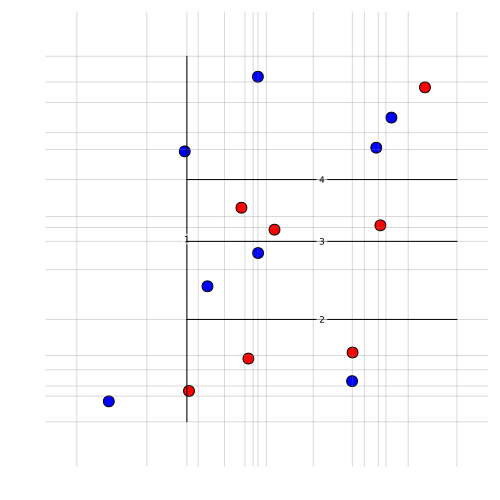

In [4]:
println("C[1,1,n,n]=$(C[1,1,n,n])")
fig = plot_rb_points(S, w)
plot_add_lines!(fig, S)
plot_guillotine_line!(fig,1,1,n,n)
fig

In [28]:
function Co(p, q, i, j)
    
    if C[p,q,i,j] != Inf
        return C[p,q,i,j]
    end
    
    if P[p,q,i,j] == 0
        return Inf
    end
    
    d = D[p,q,i,j]
    
    for s = 1:i-1
        c1 = Co(p, q, s, j)
        c2 = Co(p+s, q, i-s, j)
        cc = min(c1, c2)
        if cc > d
            d = cc
        end
    end
    
    for t = 1:j-1
        c1 = Co(p, q, i, t)
        c2 = Co(p, q+t, i, j-t)
        cc = min(c1,c2)
        if cc > d
            d = cc
        end
    end
    
    C[p,q,i,j] = d
    return d
end

Co (generic function with 1 method)

In [37]:
# Initialization #########################################################################

function init()
    global C = Inf*ones(Int,n,n,n,n)
    global P = zeros(Int,n,n,n,n)
    global D = zeros(Int,n,n,n,n)

    for p = 1:n
        for q = 1:n
            for i = 1:n-p+1
                for j = 1:n-q+1
                    P[p,q,i,j] = Count_pqij(p,q,i,j)
                    D[p,q,i,j] = Disc_pqij(p,q,i,j)
                end
                if P[p,q,1,1] != 0
                    C[p,q,1,1] = D[p,q,1,1]
                end
            end
        end
    end
end

init (generic function with 1 method)

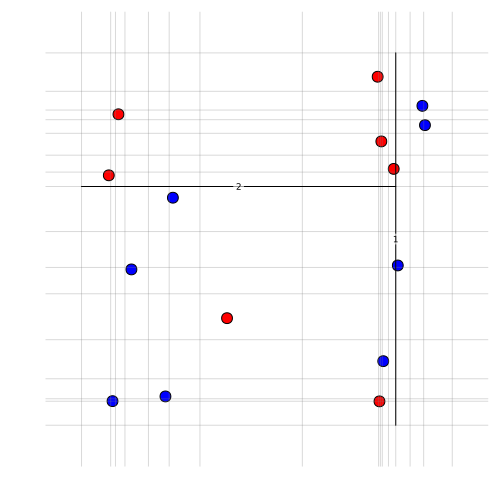

PD  : 3
B   : 3.0
BnB : 3.0


In [111]:
# BnB test

seed = 21
# Data generation ########################################################################
n = 15
rng = MersenneTwister(seed)
S = rand(rng,n,2)
half = n ÷ 2
w = shuffle(rng,[ones(Int,half)...,-ones(Int,n-half)...]) # w = rand([-1,1], n)

# Utils ##################################################################################
sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)

# Esto HAY que cambiarlo por un "orthogonal range count"
Disc_pqij(p,q,i,j) = abs(sum(w[intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1])]))
Count_pqij(p,q,i,j) = length(intersect(sortperm_x[p:p+i-1],sortperm_y[q:q+j-1]))

# PD alg to compare
C, P, D, midpoints_x, midpoints_y, argcuts, idxcuts = coarseness_g(S,w);
fig = plot_rb_points(S, w)
plot_add_lines!(fig, S)
plot_guillotine_line!(fig,1,1,n,n)
display(fig)
println("PD  : $(C[1,1,n,n])")


init()
C_b = Co(1,1,n,n)
println("B   : $C_b")

init()
C_bnb = Cg_bnb(1,1,n,n,n)
println("BnB : $C_bnb")

In [56]:
function Cg_bnb(p, q, i, j, k)
    
    if C[p,q,i,j] != Inf
        return C[p,q,i,j]
    end
    
    if P[p,q,i,j] == 0
        return Inf
    end
    
    d = D[p,q,i,j]
    c = d
    
    if d < k 
        for s = 1:i-1
            c1 = Cg_bnb(p, q, s, j, d)
            c2 = Cg_bnb(p+s, q, i-s, j, d)
            cc = min(c1, c2)
            if cc > c
                c = cc
            end
        end

        for t = 1:j-1
            c1 = Cg_bnb(p, q, i, t, d)
            c2 = Cg_bnb(p, q+t, i, j-t, d)
            cc = min(c1,c2)
            if cc > c
                c = cc
            end
        end
    end
    
    C[p,q,i,j] = c
    return c
end

Cg_bnb (generic function with 1 method)

LoadError: UndefVarError: inf not defined